In [2]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import pandas_profiling
import cufflinks as cf
cf.set_config_file(offline=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [3]:
df = pd.read_csv('Jaipur-pink-panthers.csv',index_col=0)

In [4]:
df.head()

,OVERALL,SEASON 7,SEASON 6,SEASON 5,SEASON 4,SEASON 3,SEASON 2,SEASON 1,Team-name
SEASONS,,,,,,,,,
MATCHES PLAYED,121.0,17.0,22.0,22.0,16.0,14.0,14.0,16.0,jaipur-pink-panthers
WINS,52.0,7.0,6.0,8.0,9.0,4.0,6.0,12.0,jaipur-pink-panthers
DRAWS,11.0,2.0,3.0,1.0,1.0,2.0,1.0,1.0,jaipur-pink-panthers
LOSSES,58.0,8.0,13.0,13.0,6.0,8.0,7.0,3.0,jaipur-pink-panthers
FINISHING POSITION,0.0,7.0,5.0,5.0,3.0,6.0,5.0,1.0,jaipur-pink-panthers


In [5]:
df1 = df.transpose()

In [6]:
df2 = df1.apply(pd.to_numeric, errors='coerce')

In [7]:
df2

SEASONS,MATCHES PLAYED,WINS,DRAWS,LOSSES,FINISHING POSITION,TOTAL RAIDS,SUCCESSFUL RAIDS,UNSUCCESSFUL RAID,EMPTY RAIDS,SUCCESS RAID %,...,RAID BONUS POINTS,TOTAL RAID POINTS,TOTAL TACKLES,SUCCESSFUL TACKLES,UNSUCCESFUL TACKLES,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,ALL OUTS INFLICTED,TOTAL ALL OUT POINTS,TOTAL DEFENCE POINTS
OVERALL,121.0,52.0,11.0,58.0,0.0,5095.0,1628.0,1198.0,2269.0,0.41,...,412.0,2066.0,2693.0,1031.0,1662.0,0.43,129.0,134.0,268.0,1155.0
SEASON 7,17.0,7.0,2.0,8.0,7.0,705.0,201.0,174.0,330.0,0.37,...,63.0,259.0,392.0,165.0,227.0,0.50,31.0,16.0,32.0,195.0
SEASON 6,22.0,6.0,3.0,13.0,5.0,949.0,334.0,220.0,395.0,0.44,...,102.0,415.0,551.0,202.0,349.0,0.41,25.0,22.0,44.0,225.0
SEASON 5,22.0,8.0,1.0,13.0,5.0,962.0,288.0,236.0,438.0,0.37,...,56.0,353.0,459.0,162.0,297.0,0.37,10.0,22.0,44.0,171.0
SEASON 4,16.0,9.0,1.0,6.0,3.0,666.0,203.0,139.0,324.0,0.41,...,49.0,270.0,319.0,119.0,200.0,0.42,17.0,17.0,34.0,135.0
SEASON 3,14.0,4.0,2.0,8.0,6.0,593.0,149.0,152.0,292.0,0.33,...,46.0,193.0,274.0,101.0,173.0,0.43,16.0,11.0,22.0,117.0
SEASON 2,14.0,6.0,1.0,7.0,5.0,599.0,183.0,152.0,264.0,0.39,...,43.0,232.0,298.0,124.0,174.0,0.48,18.0,17.0,34.0,142.0
SEASON 1,16.0,12.0,1.0,3.0,1.0,621.0,270.0,125.0,226.0,0.55,...,53.0,344.0,400.0,158.0,242.0,0.42,12.0,29.0,58.0,170.0
Team-name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df2['WIN%'] = df2['WINS']/df2['MATCHES PLAYED']
df2['DRAW%'] = df2['DRAWS']/df2['MATCHES PLAYED']
df2['LOSS%'] = df2['LOSSES']/df2['MATCHES PLAYED']
df2['WIN-LOSS%'] = df2['WINS']/df2['LOSSES']

In [14]:
df2.dtypes

SEASONS
MATCHES PLAYED          float64
WINS                    float64
DRAWS                   float64
LOSSES                  float64
FINISHING POSITION      float64
TOTAL RAIDS             float64
SUCCESSFUL RAIDS        float64
UNSUCCESSFUL RAID       float64
EMPTY RAIDS             float64
SUCCESS RAID %          float64
NO. OF SUPER RAIDS      float64
RAID TOUCH POINTS       float64
RAID BONUS POINTS       float64
TOTAL RAID POINTS       float64
TOTAL TACKLES           float64
SUCCESSFUL TACKLES      float64
UNSUCCESFUL TACKLES     float64
SUCCESSFUL TACKLE %     float64
NO. OF SUPER TACKLES    float64
ALL OUTS INFLICTED      float64
TOTAL ALL OUT POINTS    float64
TOTAL DEFENCE POINTS    float64
WIN%                    float64
DRAW%                   float64
LOSS%                   float64
WIN-LOSS%               float64
UNSUCCESSFUL RAID%      float64
EMPTY RAID%             float64
AVG_RAID_TOUCH_POINT    float64
AVG_RAID_BONUS_POINT    float64
UNSUCCESSFUL TACKLE%    float64


In [15]:
df2['UNSUCCESSFUL RAID%'] = df2['UNSUCCESSFUL RAID']/df2['TOTAL RAIDS']
df2['EMPTY RAID%'] = df2['EMPTY RAIDS']/df2['TOTAL RAIDS']
df2['AVG_RAID_TOUCH_POINT'] = df2['RAID TOUCH POINTS']/df2['MATCHES PLAYED']
df2['AVG_RAID_BONUS_POINT'] = df2['RAID BONUS POINTS']/df2['MATCHES PLAYED']
df2['UNSUCCESSFUL TACKLE%'] = df2['UNSUCCESFUL TACKLES']/df2['TOTAL TACKLES']
df2['AVG_ALL_OUTS'] = df2['ALL OUTS INFLICTED']/df2['MATCHES PLAYED']

In [16]:
df6 = df2.drop(['MATCHES PLAYED','WINS','DRAWS','LOSSES','SUCCESSFUL RAIDS','UNSUCCESSFUL RAID','EMPTY RAIDS','NO. OF SUPER RAIDS','RAID TOUCH POINTS','RAID BONUS POINTS','TOTAL RAID POINTS','TOTAL TACKLES','SUCCESSFUL TACKLES','UNSUCCESFUL TACKLES','ALL OUTS INFLICTED','TOTAL ALL OUT POINTS'],axis=1)

In [17]:
df6 = df6.drop(['Team-name'],axis=0)
df6

SEASONS,FINISHING POSITION,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,0.0,5095.0,0.41,0.43,129.0,1155.0,0.429752,0.090909,0.479339,0.896552,0.235132,0.445339,13.669421,3.404959,0.617156,1.107438
SEASON 7,7.0,705.0,0.37,0.50,31.0,195.0,0.411765,0.117647,0.470588,0.875000,0.246809,0.468085,11.529412,3.705882,0.579082,0.941176
SEASON 6,5.0,949.0,0.44,0.41,25.0,225.0,0.272727,0.136364,0.590909,0.461538,0.231823,0.416228,14.227273,4.636364,0.633394,1.000000
SEASON 5,5.0,962.0,0.37,0.37,10.0,171.0,0.363636,0.045455,0.590909,0.615385,0.245322,0.455301,13.500000,2.545455,0.647059,1.000000
SEASON 4,3.0,666.0,0.41,0.42,17.0,135.0,0.562500,0.062500,0.375000,1.500000,0.208709,0.486486,13.812500,3.062500,0.626959,1.062500
SEASON 3,6.0,593.0,0.33,0.43,16.0,117.0,0.285714,0.142857,0.571429,0.500000,0.256324,0.492411,10.500000,3.285714,0.631387,0.785714
SEASON 2,5.0,599.0,0.39,0.48,18.0,142.0,0.428571,0.071429,0.500000,0.857143,0.253756,0.440735,13.500000,3.071429,0.583893,1.214286
SEASON 1,1.0,621.0,0.55,0.42,12.0,170.0,0.750000,0.062500,0.187500,4.000000,0.201288,0.363929,18.187500,3.312500,0.605000,1.812500


In [18]:
df6.dtypes

SEASONS
FINISHING POSITION      float64
TOTAL RAIDS             float64
SUCCESS RAID %          float64
SUCCESSFUL TACKLE %     float64
NO. OF SUPER TACKLES    float64
TOTAL DEFENCE POINTS    float64
WIN%                    float64
DRAW%                   float64
LOSS%                   float64
WIN-LOSS%               float64
UNSUCCESSFUL RAID%      float64
EMPTY RAID%             float64
AVG_RAID_TOUCH_POINT    float64
AVG_RAID_BONUS_POINT    float64
UNSUCCESSFUL TACKLE%    float64
AVG_ALL_OUTS            float64
dtype: object

In [19]:
df6.corr().iplot(kind='heatmap',colorscale='ylgn')

In [20]:
df3= df2.loc['SEASON 5',:]

In [21]:
df3 

SEASONS
MATCHES PLAYED           22.000000
WINS                      8.000000
DRAWS                     1.000000
LOSSES                   13.000000
FINISHING POSITION        5.000000
TOTAL RAIDS             962.000000
SUCCESSFUL RAIDS        288.000000
UNSUCCESSFUL RAID       236.000000
EMPTY RAIDS             438.000000
SUCCESS RAID %            0.370000
NO. OF SUPER RAIDS       13.000000
RAID TOUCH POINTS       297.000000
RAID BONUS POINTS        56.000000
TOTAL RAID POINTS       353.000000
TOTAL TACKLES           459.000000
SUCCESSFUL TACKLES      162.000000
UNSUCCESFUL TACKLES     297.000000
SUCCESSFUL TACKLE %       0.370000
NO. OF SUPER TACKLES     10.000000
ALL OUTS INFLICTED       22.000000
TOTAL ALL OUT POINTS     44.000000
TOTAL DEFENCE POINTS    171.000000
WIN%                      0.363636
DRAW%                     0.045455
LOSS%                     0.590909
WIN-LOSS%                 0.615385
UNSUCCESSFUL RAID%        0.245322
EMPTY RAID%               0.455301
AVG_RAID_TOU

In [22]:
df3.iplot(kind='bar')

In [23]:
df4 =df6.drop('FINISHING POSITION',axis=1)
df4 =df4.drop(['SEASON 7'])
df4

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,5095.0,0.41,0.43,129.0,1155.0,0.429752,0.090909,0.479339,0.896552,0.235132,0.445339,13.669421,3.404959,0.617156,1.107438
SEASON 6,949.0,0.44,0.41,25.0,225.0,0.272727,0.136364,0.590909,0.461538,0.231823,0.416228,14.227273,4.636364,0.633394,1.000000
SEASON 5,962.0,0.37,0.37,10.0,171.0,0.363636,0.045455,0.590909,0.615385,0.245322,0.455301,13.500000,2.545455,0.647059,1.000000
SEASON 4,666.0,0.41,0.42,17.0,135.0,0.562500,0.062500,0.375000,1.500000,0.208709,0.486486,13.812500,3.062500,0.626959,1.062500
SEASON 3,593.0,0.33,0.43,16.0,117.0,0.285714,0.142857,0.571429,0.500000,0.256324,0.492411,10.500000,3.285714,0.631387,0.785714
SEASON 2,599.0,0.39,0.48,18.0,142.0,0.428571,0.071429,0.500000,0.857143,0.253756,0.440735,13.500000,3.071429,0.583893,1.214286
SEASON 1,621.0,0.55,0.42,12.0,170.0,0.750000,0.062500,0.187500,4.000000,0.201288,0.363929,18.187500,3.312500,0.605000,1.812500


In [24]:
df5 = df6['FINISHING POSITION']
df5 = df5.drop(['SEASON 7'],axis=0)
#df5['FINISHING POSITION'] = df['FINISHING POSITION'].fillna(0)
df5

OVERALL     0.0
SEASON 6    5.0
SEASON 5    5.0
SEASON 4    3.0
SEASON 3    6.0
SEASON 2    5.0
SEASON 1    1.0
Name: FINISHING POSITION, dtype: float64

In [25]:
df4

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,5095.0,0.41,0.43,129.0,1155.0,0.429752,0.090909,0.479339,0.896552,0.235132,0.445339,13.669421,3.404959,0.617156,1.107438
SEASON 6,949.0,0.44,0.41,25.0,225.0,0.272727,0.136364,0.590909,0.461538,0.231823,0.416228,14.227273,4.636364,0.633394,1.000000
SEASON 5,962.0,0.37,0.37,10.0,171.0,0.363636,0.045455,0.590909,0.615385,0.245322,0.455301,13.500000,2.545455,0.647059,1.000000
SEASON 4,666.0,0.41,0.42,17.0,135.0,0.562500,0.062500,0.375000,1.500000,0.208709,0.486486,13.812500,3.062500,0.626959,1.062500
SEASON 3,593.0,0.33,0.43,16.0,117.0,0.285714,0.142857,0.571429,0.500000,0.256324,0.492411,10.500000,3.285714,0.631387,0.785714
SEASON 2,599.0,0.39,0.48,18.0,142.0,0.428571,0.071429,0.500000,0.857143,0.253756,0.440735,13.500000,3.071429,0.583893,1.214286
SEASON 1,621.0,0.55,0.42,12.0,170.0,0.750000,0.062500,0.187500,4.000000,0.201288,0.363929,18.187500,3.312500,0.605000,1.812500


In [26]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
X = df4
y= df5
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape


(7, 10)

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['FEATURES','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

                FEATURES         Score
0            TOTAL RAIDS  12094.265191
4   TOTAL DEFENCE POINTS   2820.811978
3   NO. OF SUPER TACKLES    336.279001
8              WIN-LOSS%      7.459831
11  AVG_RAID_TOUCH_POINT      2.161638


D:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



[0.04814815 0.         0.08638889 0.05185185 0.07472222 0.11638889
 0.0875     0.09027778 0.04166667 0.09805556 0.04861111 0.05055556
 0.06481481 0.03046296 0.11055556]


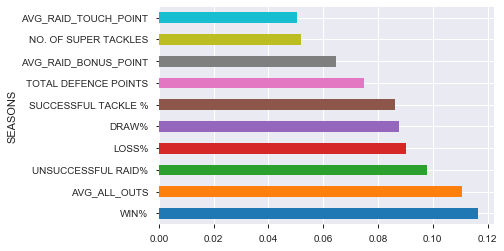

In [28]:
#Feature Importance 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [29]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model,12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['SUCCESS RAID %', 'SUCCESSFUL TACKLE %', 'WIN%', 'DRAW%', 'LOSS%',
       'WIN-LOSS%', 'UNSUCCESSFUL RAID%', 'EMPTY RAID%',
       'AVG_RAID_TOUCH_POINT', 'AVG_RAID_BONUS_POINT', 'UNSUCCESSFUL TACKLE%',
       'AVG_ALL_OUTS'],
      dtype='object')


In [30]:
X_features = df4.filter(['SUCCESS RAID %', 'SUCCESSFUL TACKLE %', 'WIN%', 'DRAW%', 'LOSS%',
       'WIN-LOSS%', 'UNSUCCESSFUL RAID%', 'EMPTY RAID%',
       'AVG_RAID_TOUCH_POINT', 'AVG_RAID_BONUS_POINT', 'UNSUCCESSFUL TACKLE%',
       'AVG_ALL_OUTS'],axis=1)
X_features.shape

(7, 12)

In [31]:
import os
os.environ['KERAS_BACKEND'] = 'theano'
import keras as ks


Using Theano backend.



You can find the C code in this temporary file: C:\Users\ANINDA~1.BHA\AppData\Local\Temp\theano_compilation_error_o77uqnk7


Exception: Compilation failed (return status=1): C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o: In function `_import_array':. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1470: undefined reference to `__imp_PyExc_ImportError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1476: undefined reference to `__imp_PyExc_AttributeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1481: undefined reference to `__imp_PyCapsule_Type'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1482: undefined reference to `__imp_PyExc_RuntimeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1497: undefined reference to `__imp_PyExc_RuntimeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1505: undefined reference to `__imp_PyExc_RuntimeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1511: undefined reference to `__imp_PyExc_RuntimeError'. D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1521: undefined reference to `__imp_PyExc_RuntimeError'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o:D:/anaconda/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1533: more undefined references to `__imp_PyExc_RuntimeError' follow. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o: In function `NpyCapsule_Check':. D:/anaconda/lib/site-packages/numpy/core/include/numpy/npy_3kcompat.h:468: undefined reference to `__imp_PyCapsule_Type'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o: In function `unpack_list_of_ssize_t':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:48: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:58: undefined reference to `__imp_PyExc_IndexError'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o: In function `CLazyLinker_init':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:352: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:370: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:385: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:389: undefined reference to `__imp_PyExc_IndexError'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o:C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:393: more undefined references to `__imp_PyExc_IndexError' follow. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o: In function `CLazyLinker_init':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:405: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:420: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:426: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:440: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:444: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o: In function `c_call':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:545: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:545: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:545: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:546: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o:C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:546: more undefined references to `__imp__Py_NoneStruct' follow. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o: In function `lazy_rec_eval':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:618: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:641: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:649: undefined reference to `__imp_PyExc_ValueError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:657: undefined reference to `__imp_PyExc_IndexError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:708: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:715: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:721: undefined reference to `__imp_PyExc_TypeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:771: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:771: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:772: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o: In function `CLazyLinker_call':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:814: undefined reference to `__imp_PyExc_RuntimeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:826: undefined reference to `__imp_PyExc_RuntimeError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:839: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:839: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:840: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:849: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:849: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o:C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:850: more undefined references to `__imp__Py_NoneStruct' follow. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o: In function `CLazyLinker_call':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:894: undefined reference to `__imp_PyExc_AssertionError'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:937: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:937: undefined reference to `__imp__Py_NoneStruct'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:938: undefined reference to `__imp__Py_NoneStruct'. C:\Users\ANINDA~1.BHA\AppData\Local\Temp\ccdmg5Fl.o: In function `CLazyLinker_set_allow_gc':. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:973: undefined reference to `__imp_PyBool_Type'. C:/Users/aninda.bhattacharjee/AppData/Local/Theano/compiledir_Windows-10-10.0.18362-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.9-64/lazylinker_ext/mod.cpp:976: undefined reference to `__imp__Py_TrueStruct'. collect2.exe: error: ld returned 1 exit status. 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model.fit(X_features, y, epochs=150, batch_size=10)

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_features, y)
print('Accuracy: %.2f' % (accuracy*100))

In [32]:
f_select = ['SUCCESS RAID %', 'SUCCESSFUL TACKLE %', 'WIN%', 'DRAW%', 'LOSS%',
       'WIN-LOSS%', 'UNSUCCESSFUL RAID%', 'EMPTY RAID%',
       'AVG_RAID_TOUCH_POINT', 'AVG_RAID_BONUS_POINT', 'UNSUCCESSFUL TACKLE%',
       'AVG_ALL_OUTS']
f_select

['SUCCESS RAID %',
 'SUCCESSFUL TACKLE %',
 'WIN%',
 'DRAW%',
 'LOSS%',
 'WIN-LOSS%',
 'UNSUCCESSFUL RAID%',
 'EMPTY RAID%',
 'AVG_RAID_TOUCH_POINT',
 'AVG_RAID_BONUS_POINT',
 'UNSUCCESSFUL TACKLE%',
 'AVG_ALL_OUTS']

In [33]:
#Using PCA to transform and decouple the dataset defined by the selected features
from sklearn.decomposition import PCA
pca = PCA()  
XX = pca.fit_transform(X[f_select]) # XX is out new training matrix that has two basis vectors
XX

array([[-3.84099542e-01,  1.90750168e-01,  1.12018358e-01,
         2.91317156e-02,  4.64041375e-02,  1.71817082e-02,
         1.32184026e-16],
       [-9.77587298e-02,  1.57332378e+00, -1.48360525e-01,
        -3.00250977e-02, -2.20637509e-02, -3.86925555e-03,
         1.32184026e-16],
       [-6.96572470e-01, -3.47509619e-01,  7.98735325e-01,
        -6.22584623e-02, -7.86194595e-02, -2.90996344e-04,
         1.32184026e-16],
       [ 1.61386952e-02, -3.82451979e-01, -3.71770156e-02,
        -1.15018247e-01,  1.05704689e-01, -5.52165315e-03,
         1.32184026e-16],
       [-3.40895012e+00, -5.52910915e-01, -6.93126895e-01,
         4.88302291e-03, -5.11302149e-02,  9.25505728e-05,
         1.32184026e-16],
       [-5.44451989e-01, -1.00353147e-01,  2.85006165e-01,
         1.59553245e-01,  3.77361940e-02, -7.99684385e-03,
         1.32184026e-16],
       [ 5.11569415e+00, -3.80848290e-01, -3.17095412e-01,
         1.37338234e-02, -3.80315952e-02,  4.04490117e-04,
         1.3218402

In [34]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [35]:
df6

SEASONS,FINISHING POSITION,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
OVERALL,0.0,5095.0,0.41,0.43,129.0,1155.0,0.429752,0.090909,0.479339,0.896552,0.235132,0.445339,13.669421,3.404959,0.617156,1.107438
SEASON 7,7.0,705.0,0.37,0.50,31.0,195.0,0.411765,0.117647,0.470588,0.875000,0.246809,0.468085,11.529412,3.705882,0.579082,0.941176
SEASON 6,5.0,949.0,0.44,0.41,25.0,225.0,0.272727,0.136364,0.590909,0.461538,0.231823,0.416228,14.227273,4.636364,0.633394,1.000000
SEASON 5,5.0,962.0,0.37,0.37,10.0,171.0,0.363636,0.045455,0.590909,0.615385,0.245322,0.455301,13.500000,2.545455,0.647059,1.000000
SEASON 4,3.0,666.0,0.41,0.42,17.0,135.0,0.562500,0.062500,0.375000,1.500000,0.208709,0.486486,13.812500,3.062500,0.626959,1.062500
SEASON 3,6.0,593.0,0.33,0.43,16.0,117.0,0.285714,0.142857,0.571429,0.500000,0.256324,0.492411,10.500000,3.285714,0.631387,0.785714
SEASON 2,5.0,599.0,0.39,0.48,18.0,142.0,0.428571,0.071429,0.500000,0.857143,0.253756,0.440735,13.500000,3.071429,0.583893,1.214286
SEASON 1,1.0,621.0,0.55,0.42,12.0,170.0,0.750000,0.062500,0.187500,4.000000,0.201288,0.363929,18.187500,3.312500,0.605000,1.812500


In [36]:
X_train = X
y_train =y 
X_test = df6.drop(['SEASON 6','SEASON 5','SEASON 4','SEASON 3','SEASON 2','SEASON 1','OVERALL'],axis=0)
X_test = X_test.drop(['FINISHING POSITION'], axis=1)
y_test = df6['FINISHING POSITION']
y_test = y_test.drop(['SEASON 6','SEASON 5','SEASON 4','SEASON 3','SEASON 2','SEASON 1','OVERALL'],axis=0)

In [37]:
X_test

SEASONS,TOTAL RAIDS,SUCCESS RAID %,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,TOTAL DEFENCE POINTS,WIN%,DRAW%,LOSS%,WIN-LOSS%,UNSUCCESSFUL RAID%,EMPTY RAID%,AVG_RAID_TOUCH_POINT,AVG_RAID_BONUS_POINT,UNSUCCESSFUL TACKLE%,AVG_ALL_OUTS
SEASON 7,705.0,0.37,0.5,31.0,195.0,0.411765,0.117647,0.470588,0.875,0.246809,0.468085,11.529412,3.705882,0.579082,0.941176


In [38]:
y_test

SEASON 7    7.0
Name: FINISHING POSITION, dtype: float64

In [39]:
# machine learning
from sklearn.svm import SVC
from sklearn import preprocessing
#import fancyimpute
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#  Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Models
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [40]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True) # Change verbose to True if you want to see it train

[16:58:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3.44818	validation_1-rmse:6.12
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:3.1826	validation_1-rmse:5.7704
[2]	validation_0-rmse:2.9383	validation_1-rmse:5.44877
[3]	validation_0-rmse:2.71362	validation_1-rmse:5.15287
[4]	validation_0-rmse:2.50699	validation_1-rmse:4.88064
[5]	validation_0-rmse:2.317	validation_1-rmse:4.63019
[6]	validation_0-rmse:2.14233	validation_1-rmse:4.39977
[7]	validation_0-rmse:1.98178	validation_1-rmse:4.18779
[8]	validation_0-rmse:1.82491	validation_1-rmse:3.99763
[9]	validation_0-rmse:1.68941	validation_1-rmse:3.81782
[10]	validation_0-rmse:1.55731	validation_1-rmse:3.65671
[11]	validation_0-rmse:1.44314	validation_1-rmse:3.50418
[12]	valida

D:\anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[49]	validation_0-rmse:0.147289	validation_1-rmse:2.06193
[50]	validation_0-rmse:0.139687	validation_1-rmse:2.05826
[51]	validation_0-rmse:0.132491	validation_1-rmse:2.05487
[52]	validation_0-rmse:0.125679	validation_1-rmse:2.05176
[53]	validation_0-rmse:0.119228	validation_1-rmse:2.0491
[54]	validation_0-rmse:0.113117	validation_1-rmse:2.04645
[55]	validation_0-rmse:0.107328	validation_1-rmse:2.04401
[56]	validation_0-rmse:0.101844	validation_1-rmse:2.04177
[57]	validation_0-rmse:0.096648	validation_1-rmse:2.03985
[58]	validation_0-rmse:0.091723	validation_1-rmse:2.03794
[59]	validation_0-rmse:0.087056	validation_1-rmse:2.03618
[60]	validation_0-rmse:0.082632	validation_1-rmse:2.03456
[61]	validation_0-rmse:0.078438	validation_1-rmse:2.03318
[62]	validation_0-rmse:0.074461	validation_1-rmse:2.03181
[63]	validation_0-rmse:0.07069	validation_1-rmse:2.03054
[64]	validation_0-rmse:0.067115	validation_1-rmse:2.02937
[65]	validation_0-rmse:0.063724	validation_1-rmse:2.02838
[66]	validation_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [41]:
pred  = pd.DataFrame()
pred['MW_Prediction'] = reg.predict(X_test)


In [42]:
pred['MW_Prediction']

0    4.982451
Name: MW_Prediction, dtype: float32

In [43]:
predict = reg.predict(X_test)
predictions = [round(value) for value in predict]
predictions

[5.0]

## Finding the win-loss% of a team for Season 7

In [45]:
df6.loc['SEASON 7','WIN-LOSS%']

0.875

## Finding the successful Raid %(successful raid/ total raid) for season 7

In [47]:
SUCC_RAID =df2.loc['SEASON 7','SUCCESSFUL RAIDS']
TOT_RAID = df2.loc['SEASON 7','TOTAL RAIDS']

SUCC_RAID_PERC = SUCC_RAID/TOT_RAID
SUCC_RAID_PERC

0.2851063829787234

## Finding the OVERALL successful Raid %(successful raid/ total raid) of a team

In [48]:
SUCC_RAID_OV =df2.loc['OVERALL','SUCCESSFUL RAIDS']
TOT_RAID_OV = df2.loc['OVERALL','TOTAL RAIDS']

SUCC_RAID_PERC_OV = SUCC_RAID_OV/TOT_RAID_OV
SUCC_RAID_PERC_OV

0.3195289499509323

## Finding the successful tackles % for season 7

In [50]:
SUCC_TACKLES =df2.loc['SEASON 7','SUCCESSFUL TACKLES']
TOT_TACKLES = df2.loc['SEASON 7','TOTAL TACKLES']

SUCC_TACKLES_PERC = SUCC_TACKLES/TOT_TACKLES
SUCC_TACKLES_PERC

0.42091836734693877

## Finding the Super-performance total of the team

In [49]:
SUPER_RAIDS = df2.loc['SEASON 7','NO. OF SUPER RAIDS']
SUPER_TACKLES = df2.loc['SEASON 7','NO. OF SUPER TACKLES']
All_OUTS_INFLICTED = df2.loc['SEASON 7','ALL OUTS INFLICTED']
All_OUTS_CONCEDED = 23

SPT = SUPER_RAIDS+SUPER_TACKLES+All_OUTS_INFLICTED-All_OUTS_CONCEDED
SPT

30.0